In [1]:
import torch
from torch import nn, optim
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from torch.utils.data import Dataset, DataLoader

class Data(Dataset):
    
    def __init__(self, train = True):
        self.x = torch.arange(-3,3,0.1).view(-1,1)
        self.f = -3 * self.x + 1
        self.y = self.f + 0.1 * torch.randn(self.x.size())
        self.len = self.x.shape[0]
        
        # outliers
        if train == True:
            self.y[0] = 0
            self.y[50:55] = 20
        else:
            pass
    
    def __getitem__(self,index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len
    


In [4]:
# create training dataset and validation dataset
train_data = Data()
val_data = Data(train=False)

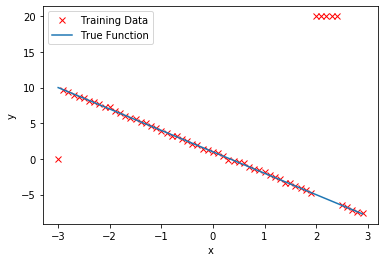

In [5]:
plt.plot(train_data.x.numpy(), train_data.y.numpy(), 'xr', label = 'Training Data')
plt.plot(train_data.x.numpy(), train_data.f.numpy(), label = 'True Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [6]:
# create a linear regression class


class linear_regression(nn.Module):
    
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    # prediction
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [7]:
criterion = nn.MSELoss()
trainloader = DataLoader(dataset=train_data, batch_size=1)

In [8]:
# create learning rates, error list and model list
learning_rates = [0.0001, 0.001, 0.01, 0.1]

train_error = torch.zeros(len(learning_rates))
validation_error = torch.zeros(len(learning_rates))

MODELS = []

In [9]:
# define the train model function and train the model

def train_model_with_lr(iter, lr_list):
    
    # iter through different learning rates
    for i, lr in enumerate(lr_list):
        model = linear_regression(1,1)
        optimizer = optim.SGD(model.parameters(), lr=lr)
        
        for epoch in range(iter):
            for x, y in trainloader:
                yhat = model(x)
                loss = criterion(yhat,y)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
            
        # train data
        Yhat = model(train_data.x)
        train_loss = criterion(Yhat, train_data.y)
        train_error[i] = train_loss.item()
        
        # validation data
        Yhat = model(val_data.x)
        val_loss = criterion(Yhat, val_data.y)
        validation_error[i] = val_loss.item()
        MODELS.append(model)
        
train_model_with_lr(10, learning_rates)

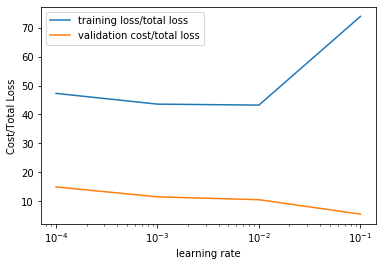

In [10]:
plt.semilogx(np.array(learning_rates), train_error.numpy(), label = 'training loss/total loss')
plt.semilogx(np.array(learning_rates), validation_error.numpy(), label = 'validation cost/total loss')
plt.ylabel('Cost/Total Loss')
plt.xlabel('learning rate')
plt.legend()
plt.show()

i [[3.4529097]
 [3.376879 ]
 [3.3008482]]
i [[5.789303 ]
 [5.6729965]
 [5.5566897]]
i [[6.5718513]
 [6.438695 ]
 [6.305539 ]]
i [[14.384602]
 [13.952547]
 [13.520494]]


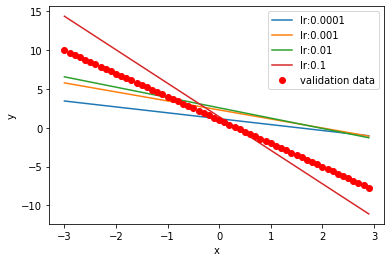

In [11]:
# plot the prediction

i = 0
for model, learning_rate in zip(MODELS, learning_rates):
    yhat = model(val_data.x)
    plt.plot(val_data.x.numpy(), yhat.detach().numpy(), label = 'lr:' + str(learning_rate))
    print('i', yhat.detach().numpy()[0:3])
    
plt.plot(val_data.x.numpy(), val_data.f.numpy(), 'or', label = 'validation data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()